In [6]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm
mpl.style.use('bmh')

# Introducción al análisis predictivo con Regresión
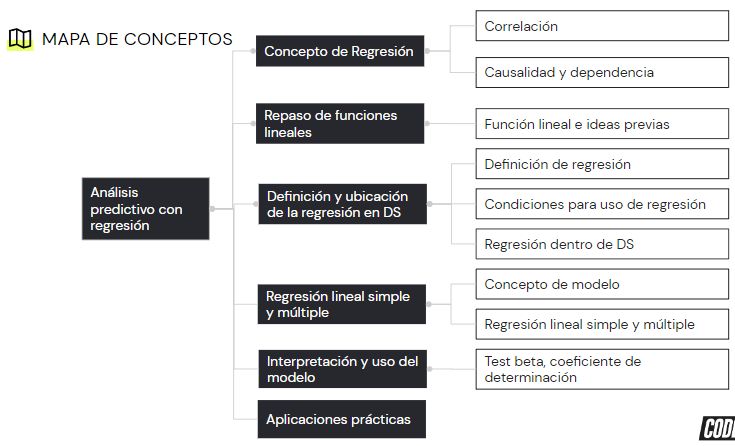

## REGRESIÓN

VAR INDEPENDIENTE (característica): son las características que queremos usar para predecir algún valor dado de *y*.

VAR DEPENDIENTE (objetivo): es la característica que estamos tratando de predecir.

El objetivo es predecir la variable dependiente (y) en función de los valores de las variables independientes (x).

Se puede usar para los casos donde queremos predecir alguna cantidad continua, por ejemplo, predecir el tráfico en una tienda minorista, predecir el tiempo de permanencia de un usuario o el número de páginas visitadas en un blog, etc.
_______________________________________________________________________________

Significativo: Que el p valor < significancia
R2 para bondad de ajuste de una regresion

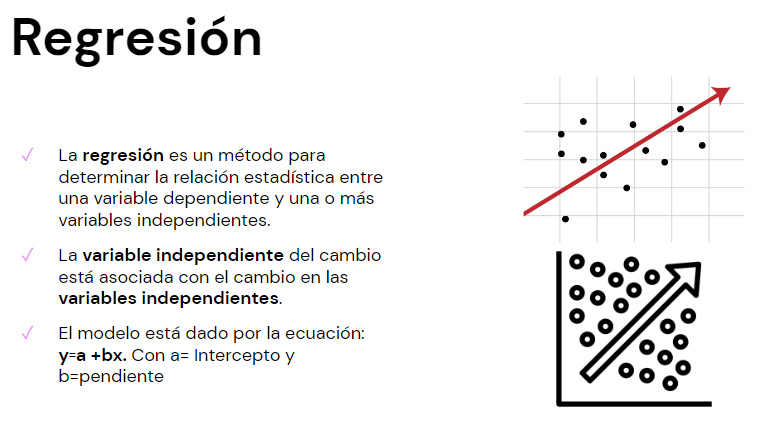
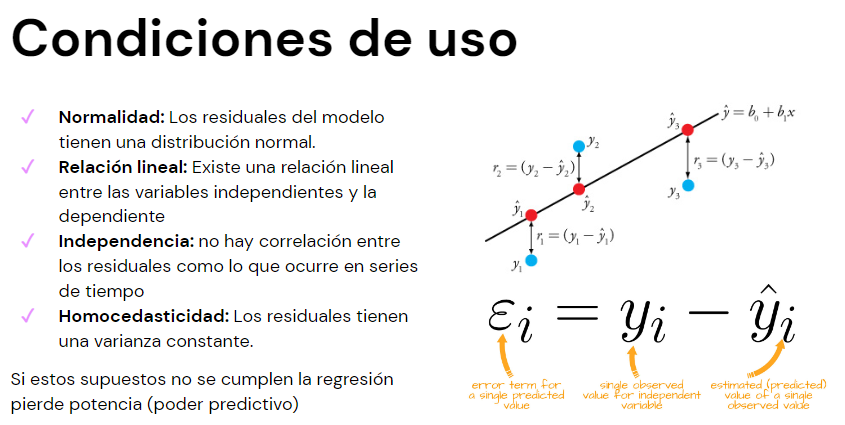
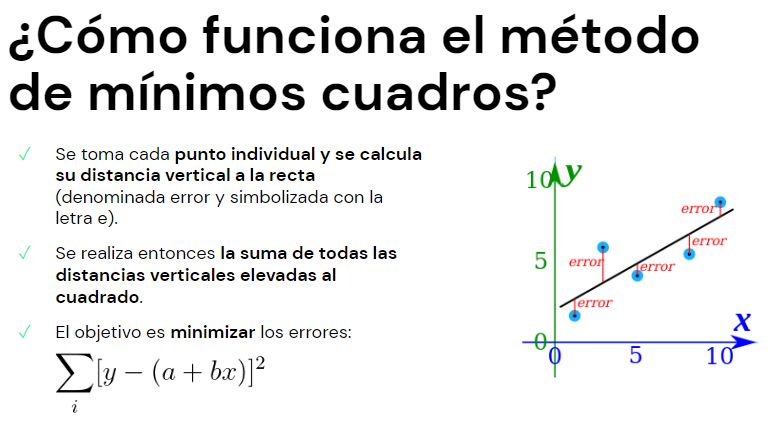

### Regresión dentro de DS
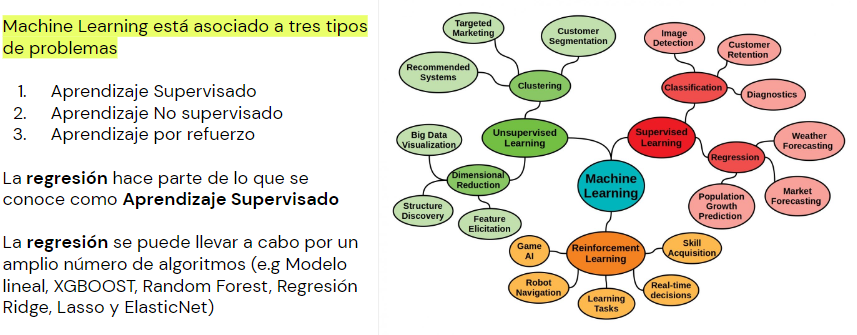
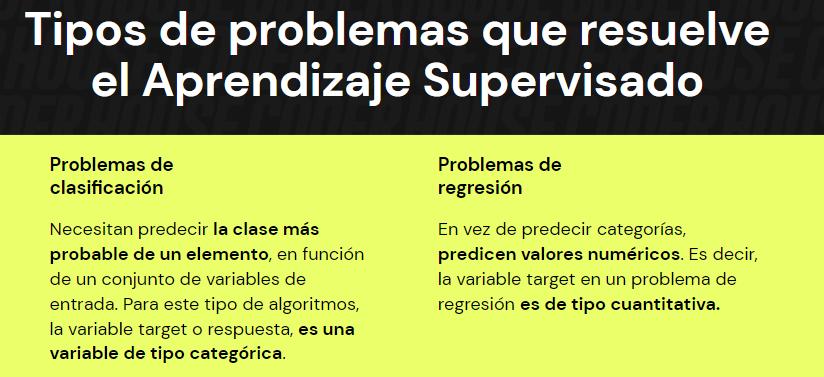
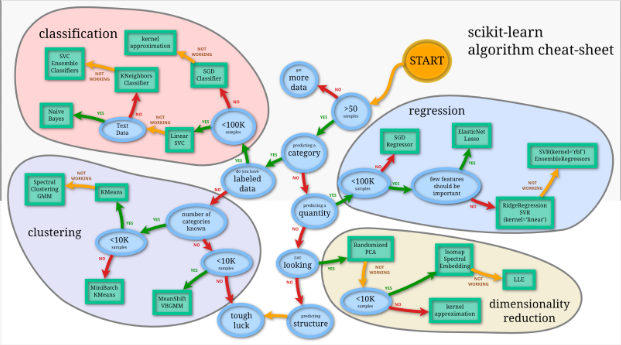

### DATASET: Glassdoor data

In [2]:
data = pd.read_csv('../datasets/glassdoordata.csv')
data.head()

,jobtitle,gender,age,performance,education,department,seniority,income,bonus
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938
1,Software Engineer,Male,21,5,College,Management,5,108476,11128
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319


In [3]:
data.shape

(1000, 9)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   jobtitle     1000 non-null   object
 1   gender       1000 non-null   object
 2   age          1000 non-null   int64 
 3   performance  1000 non-null   int64 
 4   education    1000 non-null   object
 5   department   1000 non-null   object
 6   seniority    1000 non-null   int64 
 7   income       1000 non-null   int64 
 8   bonus        1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [5]:
data.isnull().sum()

jobtitle       0
gender         0
age            0
performance    0
education      0
department     0
seniority      0
income         0
bonus          0
dtype: int64

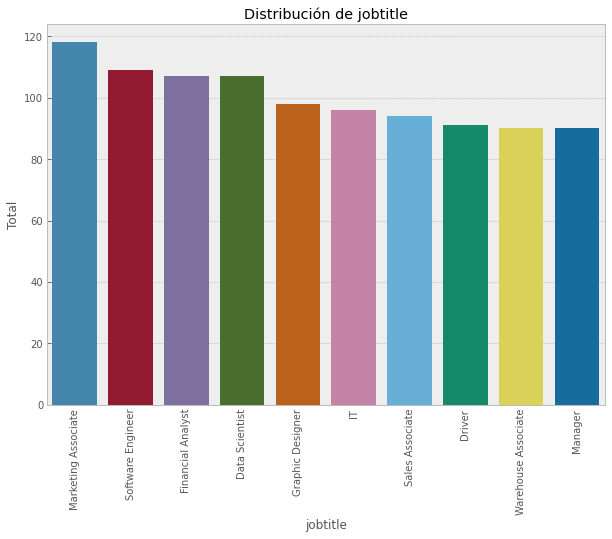

In [14]:
# Total de trabajos por titulo
plt.figure(figsize=(10,7))
sns.countplot(data=data, x='jobtitle', order=data['jobtitle'].value_counts().index)
plt.title('Distribución de jobtitle')
plt.ylabel('Total')
plt.xticks(rotation=90)
plt.show()

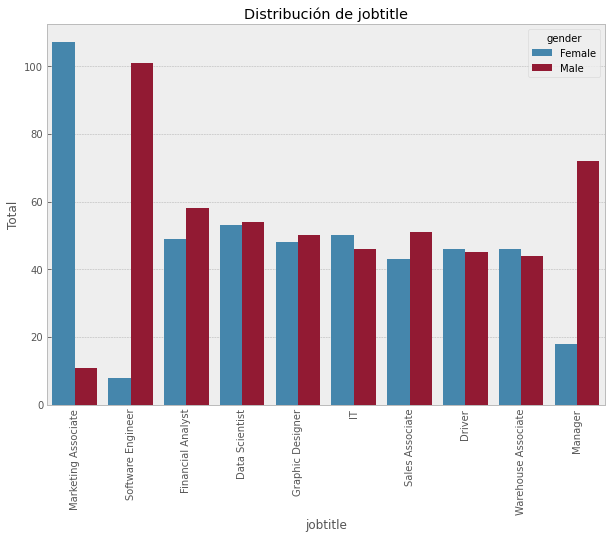

In [15]:
# Total de trabajos por titulo desagregado por género
plt.figure(figsize=(10,7))
sns.countplot(data=data, x='jobtitle', order=data['jobtitle'].value_counts().index, hue='gender')
plt.title('Distribución de jobtitle')
plt.ylabel('Total')
plt.xticks(rotation=90)
plt.show()

In [16]:
# 
data['pay'] = data['income'] + data['bonus']
data.head()

,jobtitle,gender,age,performance,education,department,seniority,income,bonus,pay
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938,52301
1,Software Engineer,Male,21,5,College,Management,5,108476,11128,119604
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268,99476
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154,118234
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319,108783


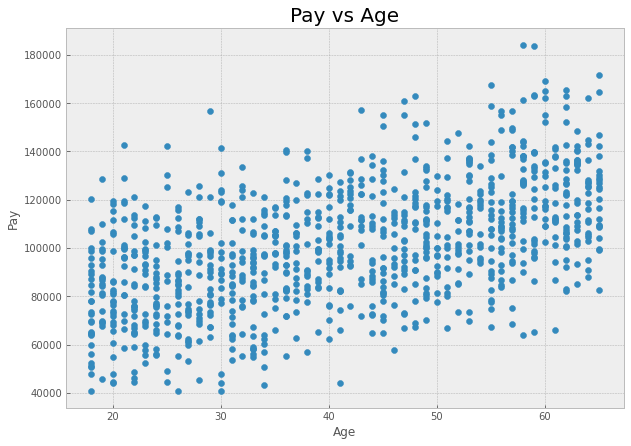

In [19]:
# Comparación de pago vs edad
plt.figure(figsize=(10,7))
plt.scatter(data['age'], data['pay'])
plt.title('Pay vs Age', fontsize=20)
plt.xlabel('Age')
plt.ylabel('Pay')
plt.show()

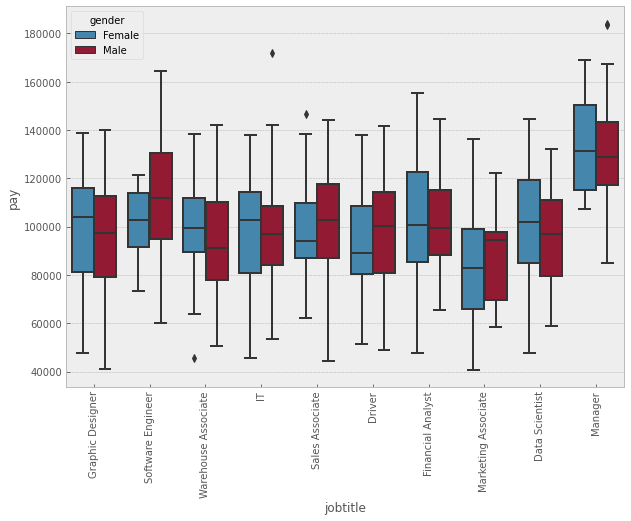

In [21]:
# Comparación jobtitle vs pago desagregado por genero
plt.figure(figsize=(10,7))
sns.boxplot(data=data, x='jobtitle', y='pay', hue='gender')
plt.xticks(rotation=90)
plt.show()

<Figure size 720x504 with 0 Axes>

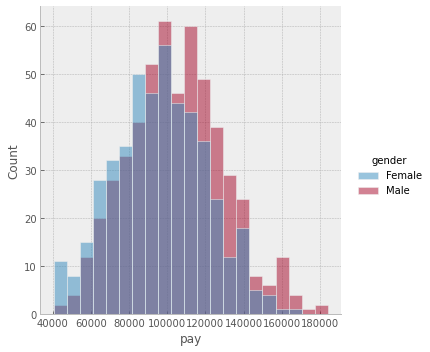

In [25]:
# histograma de pago desagregado por genero
plt.figure(figsize=(10, 7))
sns.displot(data=data, x='pay', hue='gender')
plt.show()

# en promedio el pago es mayor para las hombres que para los mujeres

<Figure size 720x504 with 0 Axes>

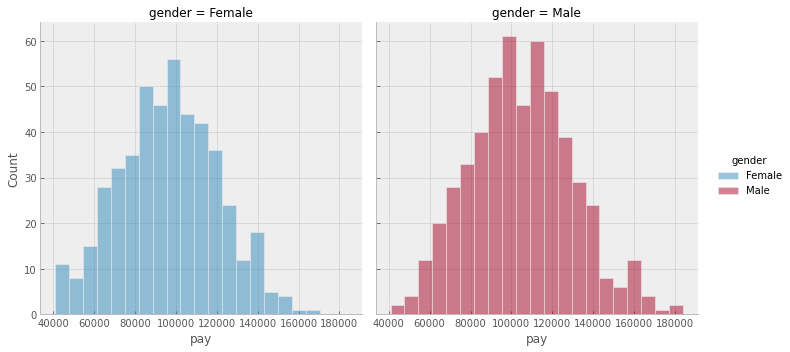

In [27]:
plt.figure(figsize=(10, 7))
sns.displot(data=data, x='pay', hue='gender', col='gender')
plt.show()

<Figure size 1440x1440 with 0 Axes>

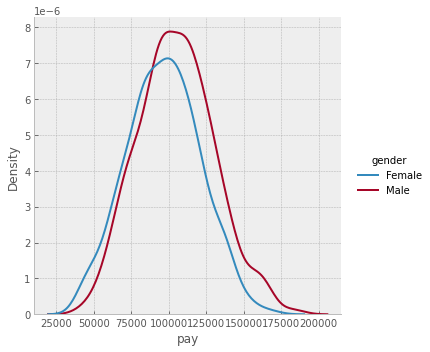

In [28]:
plt.figure(figsize=(20, 20))
sns.displot(data=data, x='pay', hue='gender', kind='kde')
plt.show()

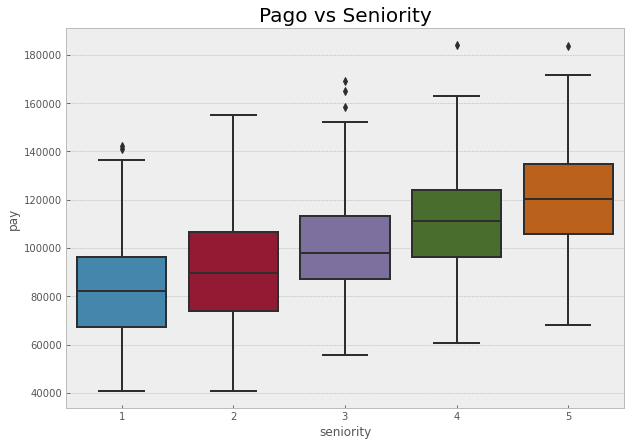

In [30]:
# comparacion de pago vs seniority
plt.figure(figsize=(10, 7))
sns.boxplot(data=data, x='seniority', y='pay')
plt.title('Pago vs Seniority', fontsize=20)
plt.show()

# a mayor seniority mayor pago

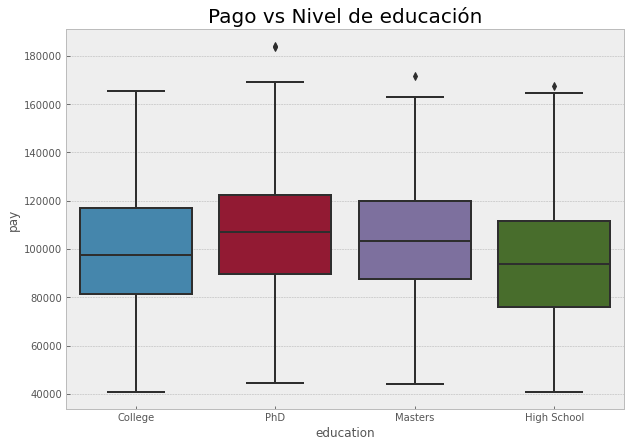

In [31]:
# comparacion de pago vs nivel de educacion
plt.figure(figsize=(10, 7))
sns.boxplot(data=data, x='education', y='pay')
plt.title('Pago vs Nivel de educación', fontsize=20)
plt.show()

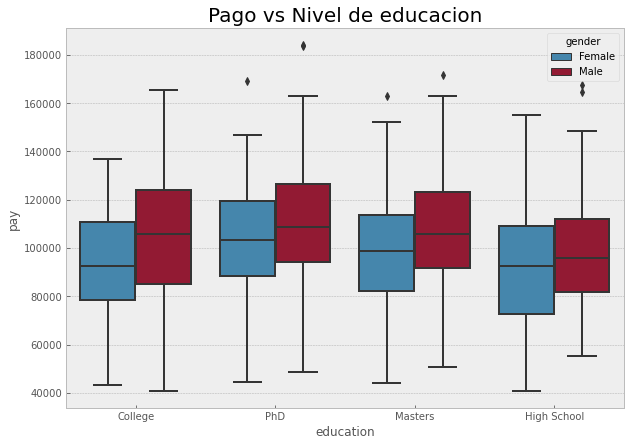

In [33]:
# comparacion de pago vs nivel de educacion
plt.figure(figsize=(10, 7))
sns.boxplot(data=data, x='education', y='pay', hue='gender')
plt.title('Pago vs Nivel de educacion', fontsize=20)
plt.show()

In [34]:
# para variables numericas
data.describe()

,age,performance,seniority,income,bonus,pay
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,41.393000,3.037000,2.971000,94472.653000,6467.161000,100939.814000
std,14.294856,1.423959,1.395029,25337.493272,2004.377365,25156.599655
min,18.000000,1.000000,1.000000,34208.000000,1703.000000,40828.000000
25%,29.000000,2.000000,2.000000,76850.250000,4849.500000,83443.000000
50%,41.000000,3.000000,3.000000,93327.500000,6507.000000,100047.000000
75%,54.250000,4.000000,4.000000,111558.000000,8026.000000,117656.000000
max,65.000000,5.000000,5.000000,179726.000000,11293.000000,184010.000000


In [35]:
# para variables categoricas
data.describe(include='object')

,jobtitle,gender,education,department
count,1000,1000,1000,1000
unique,10,2,4,5
top,Marketing Associate,Male,High School,Operations
freq,118,532,265,210


### MODELO: Multivariable contra Pago

In [36]:
data.columns

Index(['jobtitle', 'gender', 'age', 'performance', 'education', 'department',
       'seniority', 'income', 'bonus', 'pay'],
      dtype='object')

In [37]:
data.head()

,jobtitle,gender,age,performance,education,department,seniority,income,bonus,pay
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938,52301
1,Software Engineer,Male,21,5,College,Management,5,108476,11128,119604
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268,99476
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154,118234
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319,108783


In [39]:
# Modelo edad contra pago
modelo1 = 'pay~age'
lm1 = sm.ols(formula=modelo1, data=data).fit()

# Resultados de la regresión
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    pay   R-squared:                       0.285
Model:                            OLS   Adj. R-squared:                  0.284
Method:                 Least Squares   F-statistic:                     397.5
Date:                Sat, 07 Jan 2023   Prob (F-statistic):           1.04e-74
Time:                        14:00:10   Log-Likelihood:                -11384.
No. Observations:                1000   AIC:                         2.277e+04
Df Residuals:                     998   BIC:                         2.278e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6.206e+04   2062.885     30.085      0.000     5.8e+04    6.61e+04
age          939.2501     47.109     19.938      0.000     846.806    1031.694
==============================================================================
Omnibus:                        6.360   Durbin-Watson:                   1.905
Prob(Omnibus):                  0.042   Jarque-Bera (JB):                6.421
Skew:                           0.182   Prob(JB):                       0.0403
Kurtosis:                       2.853   Cond. No.                         134.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
# modelo edad y genero contra pago
modelo2 = 'pay~age + gender'
lm2 = sm.ols(formula=modelo2, data=data).fit()

# Resultados de la regresión
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    pay   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.317
Method:                 Least Squares   F-statistic:                     233.2
Date:                Sat, 07 Jan 2023   Prob (F-statistic):           8.10e-84
Time:                        14:06:51   Log-Likelihood:                -11359.
No. Observations:                1000   AIC:                         2.272e+04
Df Residuals:                     997   BIC:                         2.274e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.674e+04   2151.480     26.373      0.000    5.25e+04     6.1e+04
gender[T.Male]  9279.3180   1317.787      7.042      0.000    6693.364    1.19e+04
age              948.5266     46.022     20.610      0.000     858.216    1038.837
==============================================================================
Omnibus:                        9.898   Durbin-Watson:                   1.871
Prob(Omnibus):                  0.007   Jarque-Bera (JB):                9.345
Skew:                           0.197   Prob(JB):                      0.00935
Kurtosis:                       2.737   Cond. No.                         148.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
# modelo jobtitle, edad, performance, educacion, departamento, seniority y genero contra pago
model4 = 'pay~jobtitle + age + performance + education + department +seniority + gender'
lm4 = sm.ols(formula=model4, data=data).fit()

# Resultados de la regresión
lm4.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    pay   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     259.6
Date:                Sat, 07 Jan 2023   Prob (F-statistic):               0.00
Time:                        14:37:42   Log-Likelihood:                -10631.
No. Observations:                1000   AIC:                         2.130e+04
Df Residuals:                     979   BIC:                         2.141e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                        2.203e+04   1933.534     11.392      0.000    1.82e+04    2.58e+04
jobtitle[T.Driver]              -3928.9812   1447.166     -2.715      0.007   -6768.886   -1089.076
jobtitle[T.Financial Analyst]    3417.7090   1388.276      2.462      0.014     693.370    6142.048
jobtitle[T.Graphic Designer]    -2457.6992   1420.886     -1.730      0.084   -5246.031     330.633
jobtitle[T.IT]                  -2149.7022   1427.414     -1.506      0.132   -4950.846     651.442
jobtitle[T.Manager]               3.16e+04   1471.445     21.476      0.000    2.87e+04    3.45e+04
jobtitle[T.Marketing Associate] -1.701e+04   1385.795    -12.277      0.000   -1.97e+04   -1.43e+04
jobtitle[T.Sales Associate]       263.4456   1435.261      0.184      0.854   -2553.096    3079.988
jobtitle[T.Software Engineer]    1.339e+04   1413.182      9.473      0.000    1.06e+04    1.62e+04
jobtitle[T.Warehouse Associate]  -564.0171   1452.967     -0.388      0.698   -3415.305    2287.271
education[T.High School]        -1435.1693    908.773     -1.579      0.115   -3218.536     348.198
education[T.Masters]             4717.9971    914.421      5.160      0.000    2923.546    6512.448
education[T.PhD]                 6026.2867    929.705      6.482      0.000    4201.842    7850.731
department[T.Engineering]        3267.9358   1036.509      3.153      0.002    1233.901    5301.970
department[T.Management]         2957.8290   1033.031      2.863      0.004     930.619    4985.039
department[T.Operations]         -481.4968   1014.616     -0.475      0.635   -2472.570    1509.577
department[T.Sales]              6193.4962   1020.679      6.068      0.000    4190.526    8196.466
gender[T.Male]                    392.3244    715.798      0.548      0.584   -1012.351    1797.000
age                               948.9464     22.527     42.126      0.000     904.740     993.152
performance                      1156.8797    228.188      5.070      0.000     709.085    1604.674
seniority                        9903.7103    231.490     42.782      0.000    9449.436    1.04e+04
==============================================================================
Omnibus:                        3.500   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.174   Jarque-Bera (JB):                3.555
Skew:                          -0.130   Prob(JB):                        0.169
Kurtosis:                       2.866   Cond. No.                         453.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Interpretación de los modelos

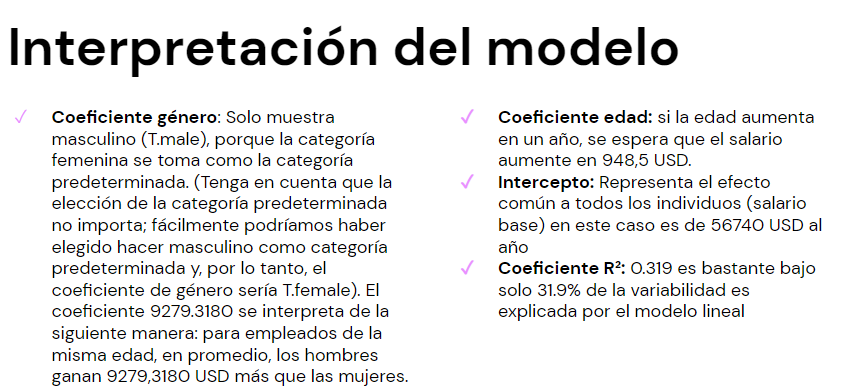


In [43]:
# media de los ingresos desagregado por genero
serie = data.groupby('gender').mean()['pay']
serie

gender
Female     96416.831197
Male      104918.678571
Name: pay, dtype: float64

In [47]:
# diferencia de los salarios promedio entre hombres y mujeres
serie['Male'] - serie['Female']

8501.847374847363

In [49]:
# media de los ingresos desagregado por jobtitle y genero
serie = data.groupby(['jobtitle', 'gender']).mean()[['pay']]
serie

pay
jobtitle            gender               
Data Scientist      Female  102452.264151
                    Male     95450.000000
Driver              Female   93197.347826
                    Male     98417.800000
Financial Analyst   Female  101743.653061
                    Male    101116.362069
Graphic Designer    Female   98810.416667
                    Male     96584.080000
IT                  Female   96837.940000
                    Male     97239.586957
Manager             Female  133244.277778
                    Male    130929.152778
Marketing Associate Female   82251.149533
                    Male     88161.636364
Sales Associate     Female   98220.534884
                    Male    100893.549020
Software Engineer   Female  101147.375000
                    Male    113033.811881
Warehouse Associate Female  100083.934783
                    Male     93363.613636

# Modelos analíticos para DS
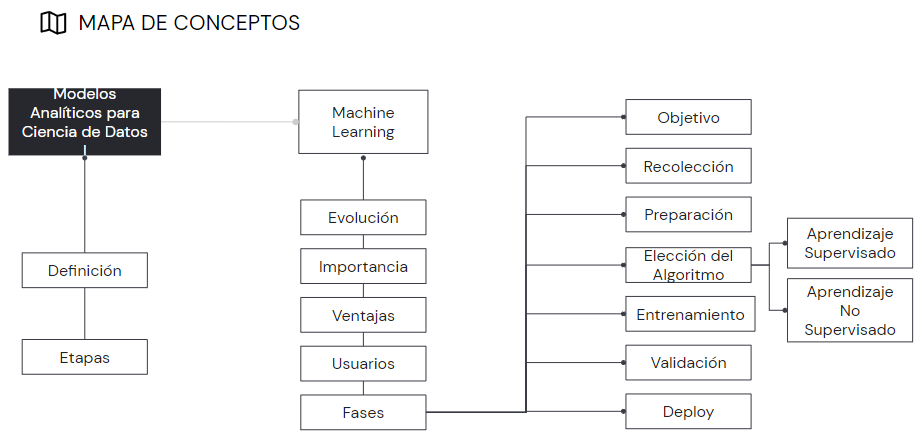

Es un proceso que permite combinar datos heterogéneos de muchas fuentes diferentes. 
Por lo tanto, facilita que distintos tipos de datos sean fusionados para posteriormente poder ser analizados de manera conjunta”. 
Existen múltiples definiciones al respecto. Sin embargo, elegimos esta definición para el desarrollo del curso 🧐

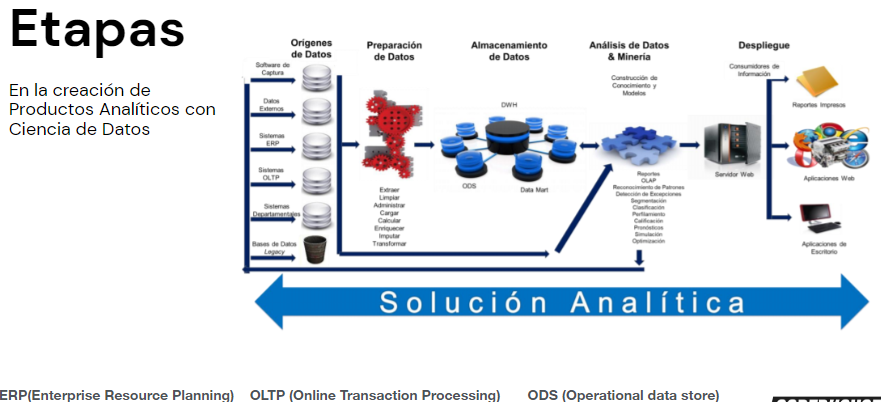

## Machine Learning
**IA** se refiere a la **capacidad de una máquina de realizar tareas y/o procesos**, los cuales requieren de una “inteligencia” similar a la de un ser humano, desarrollándolas de la misma forma o mejor que una persona.

* Método de análisis de datos que **automatiza la construcción de “Modelos Analíticos”**.
* Rama de la Inteligencia Artificial (AI), basada en la idea de que **los sistemas pueden aprender de datos, identificar patrones y tomar decisiones** con una mínima intervención humana.

Aprender en este contexto quiere decir: identificar patrones complejos en millones de datos 🤓

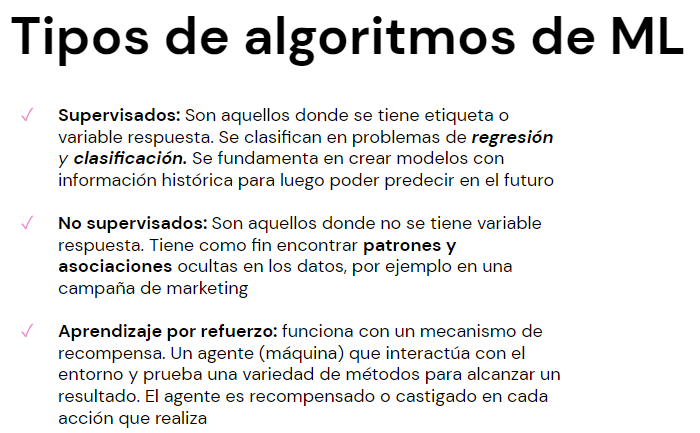
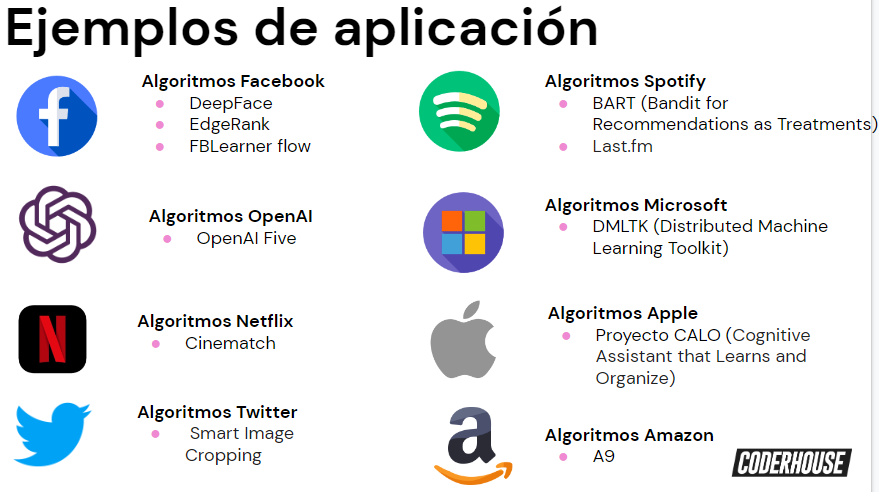
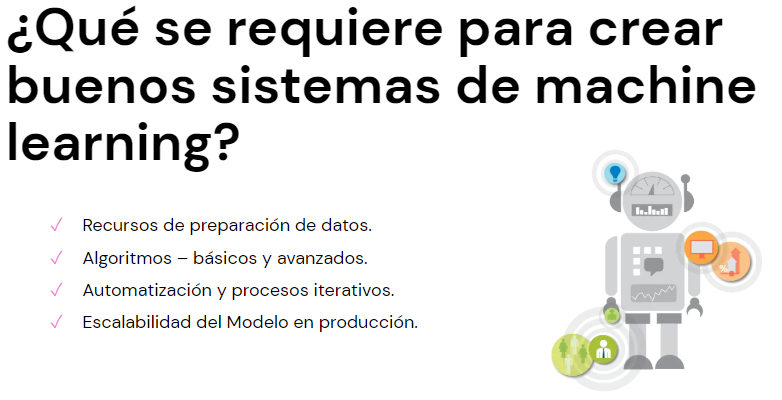

Los modelos analíticos más usados son:
* **Clasificación**: predecir categorías de interés
* **Clustering**: crear grupos con base en atributos en común
* **Modelos de pronóstico**: con el fin de anticiparse a eventos
* **Detección de atípicos**: identificar anomalías
* **Series de tiempo**: para predecir tendencias y comportamientos esperados

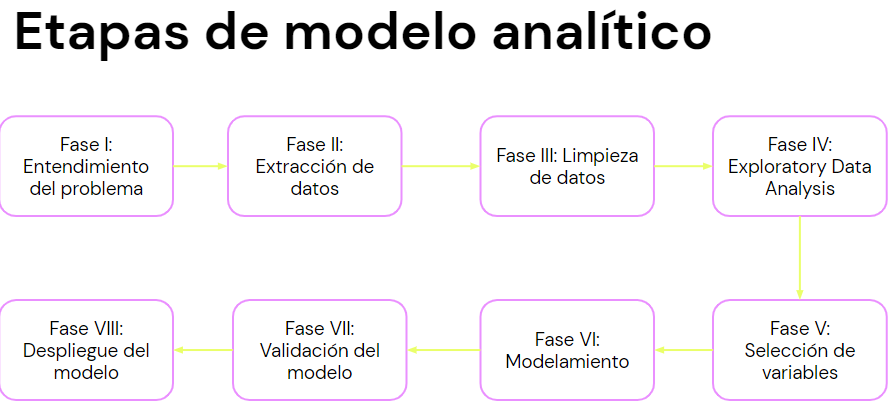
